## House Price Prediction Project

**Problem Statement**

The company has a dataset containing the bay area house information such as lot area, price, etc. It wants to use the data to figure out what factors drive house price by performing multiple linear regression analysis.

**Data**

Use house information dataset.

### Data Inspection & Data Cleaning

Import required package

In [1]:
import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation packages

import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
# Load the dataset 
dat = pd.DataFrame(pd.read_csv("rawdata_house information.csv"))

Check the first few rows of the dataset

In [3]:
dat.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Check the last few row of the dataset

In [4]:
dat.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


Explore the data

In [5]:
dat.shape

(1460, 81)

There are 1460 rows, which means there are 1460 houses information. There are 81 columns, which means there are 79 features because id is not an useful predictor, and SalePrice is the response factor.


In [6]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
dat.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


There are 36 numeric variable excluding id and SalePrice.

MSSubClass is also a categorical variable. However, the type of MSSubClass is int. Thus, the function below is to transform MSSubClass to a categorical variable.

In [8]:
def tran_MSSubClass(x):
    return x.map({20: '20', 30: '30', 40: '40',
                 45: '45', 50: '50', 60: '60',
                 70: '70', 75: '75', 80: '80',
                 85: '85', 90: '90', 120: '120',
                 150: '150', 160: '160', 180: '180',
                 190: '190'})
dat['MSSubClass'] = tran_MSSubClass(dat['MSSubClass'])

In [9]:
dat_without_dummy_variable_having_NA_category = dat.drop(['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)

In [10]:
# Checking Null values
dat_contain_missing_value_per = pd.DataFrame({"MissingValuePercent": dat_without_dummy_variable_having_NA_category.isnull().sum()*100/dat.shape[0]})
dat_contain_missing_value_per.loc[dat_contain_missing_value_per['MissingValuePercent'] > 0]

,MissingValuePercent
LotFrontage,17.739726
MasVnrType,0.547945
MasVnrArea,0.547945
Electrical,0.068493
GarageYrBlt,5.547945
GarageQual,5.547945


From above, we can see that there are many columns contain missing values. LotFrontage contains 17.739726% missing values. Since 17.739726% is a quite large number, I am not going to use LotFrontage as a predictor.

In [11]:
# Drop LotFrontage
dat_without_dummy_variable_having_NA_category = dat_without_dummy_variable_having_NA_category.drop(['LotFrontage'], axis = 1)

In [12]:
# Delete the rows containing missing values for the variables do not contain a category NA
dat_without_dummy_variable_having_NA_category.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)

In [13]:
# Merge dat_without_dummy_variable_having_NA_category and dat
dat.drop(['LotFrontage'], axis = 1, inplace = True)

# temp is the dataframe that all the rows do not contain missing values, but it has duplicated columns
temp = pd.merge(dat, dat_without_dummy_variable_having_NA_category, on=["Id", "Id"], how="inner")


In [14]:
# Update the dat and dat does not contain missing values
dat = dat.iloc[temp['Id']-1, ]
dat.shape

(1370, 80)

After dropping all the missing values, there are 1370 rows.

In [15]:
# Drop Id from dat
dat.drop(['Id'], axis = 1, inplace = True)

In [16]:
# Select the numeric columns and find its outliers
dat_with_numeric_variable = dat.select_dtypes(include='number')
numeric_variable_name = list(dat_with_numeric_variable)

(1312, 79)

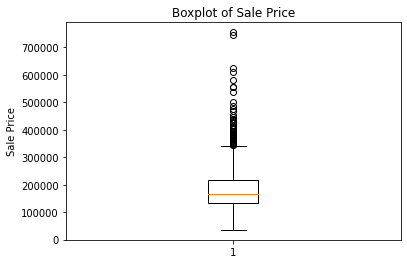

In [17]:
# Function to create dataframe that does not contain the outliers for the given dataframe 
# and column. Also, visualize the boxplot of that variable
def outlier(df, colname):
    plt.boxplot(df[colname])
    plt.title("Boxplot of Sale Price")
    plt.ylabel("Sale Price")
    Q1 = df[colname].quantile(0.25)
    Q3 = df[colname].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[colname] >= Q1 - 1.5*IQR) & (df[colname] <= Q3 + 1.5*IQR)]
    return df
# Delete the rows that containing the outliers for SalePrice and updat the dataframe
dat = outlier(dat, 'SalePrice')
dat.shape

There are 1312 rows after dropping the SalePrice outliers.

**Dummy Variable**

If use get_dummies for the entire dataframe(dat), there will not be a dummy variable for category NA for those variables having a category NA. Thus, I have two temporary dataframes(temp1 and temp2). temp1 is output that performed get_dummies() to the dataframe that does not contain the categorical variables that have a category NA. temp2 is output that performed get_dummies() to the dataframe that only contains the categorical variables that have a category NA.

In [18]:
temp1 = pd.get_dummies(dat.drop(['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1), drop_first=True)
temp2 = pd.get_dummies(dat[['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']])
# Combine temp1 and temp2
dat = pd.concat([temp1, temp2], axis=1).reset_index(drop = True)

In [19]:
dat.shape

(1312, 269)

### Exploratory Data Analytics

**Understanding the data**
1. Identify multicollinearity

2. Identify if some predictors directly have a strong association with the response variable (SalePrice)

**Visualising Numeric Variables**

If including a pairplot of all the numeric variables, there will be a plot containing 36 x 36 figures. It tooks a long time to run and it is hard to visualize as well. Thus, I am going to obtain the correlation matrix, and for highly correlated variables, plot a scatter plot to visualize the relation.


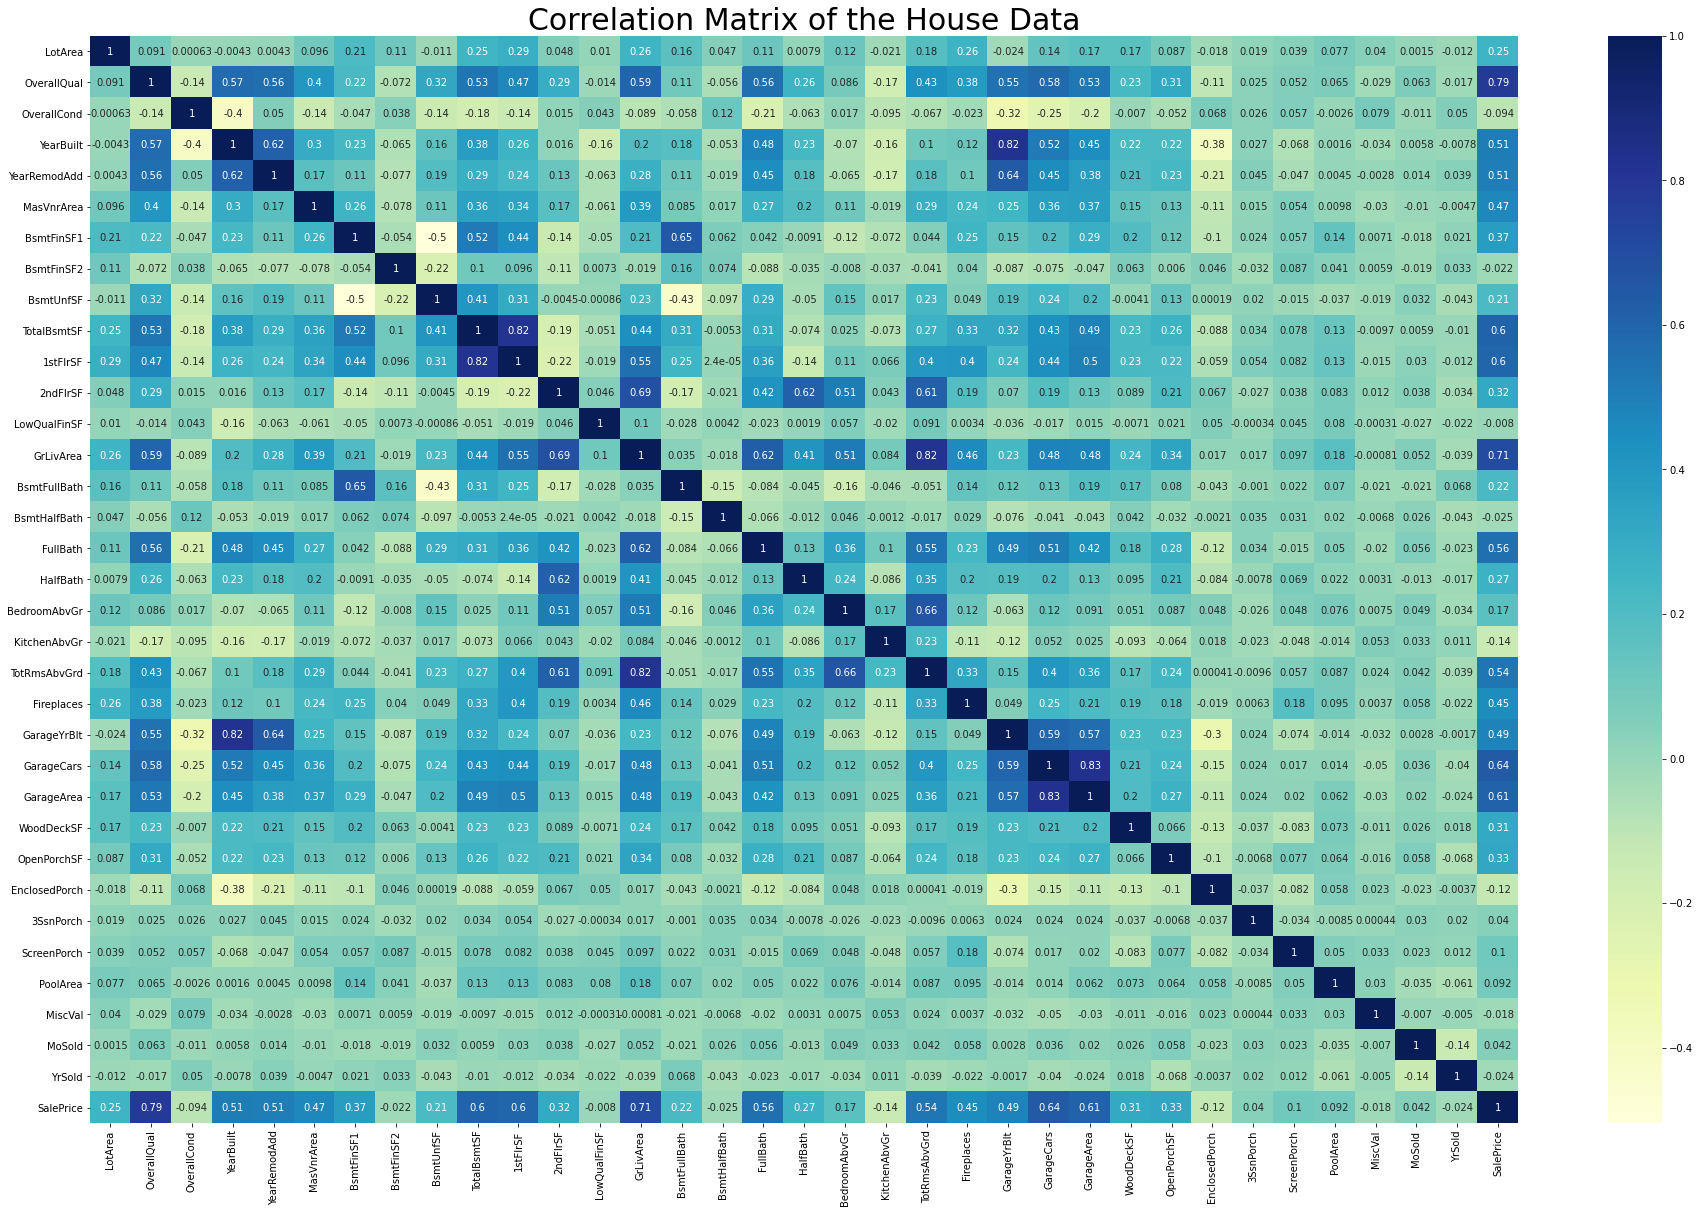

In [22]:
# correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (32, 20))
sns.heatmap(dat_with_numeric_variable.corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Matrix of the House Data", fontsize = 30)
plt.show()

Figure out what variable has high correlation with SalePrice, which means that the absolute value of the correlation coefficient between this variable and SalePrice is larger than or equal to 0.5 

In [23]:
dat.corr().iloc[34, 0:33][abs(dat.corr().iloc[34, 0:33]) >= 0.5]

OverallQual     0.778619
YearBuilt       0.551258
YearRemodAdd    0.543610
TotalBsmtSF     0.527462
1stFlrSF        0.506980
GrLivArea       0.660986
FullBath        0.578680
GarageYrBlt     0.508095
GarageCars      0.605801
GarageArea      0.575805
Name: SalePrice, dtype: float64

The variable listed above might be the important factors that drive the sale price of the house. 

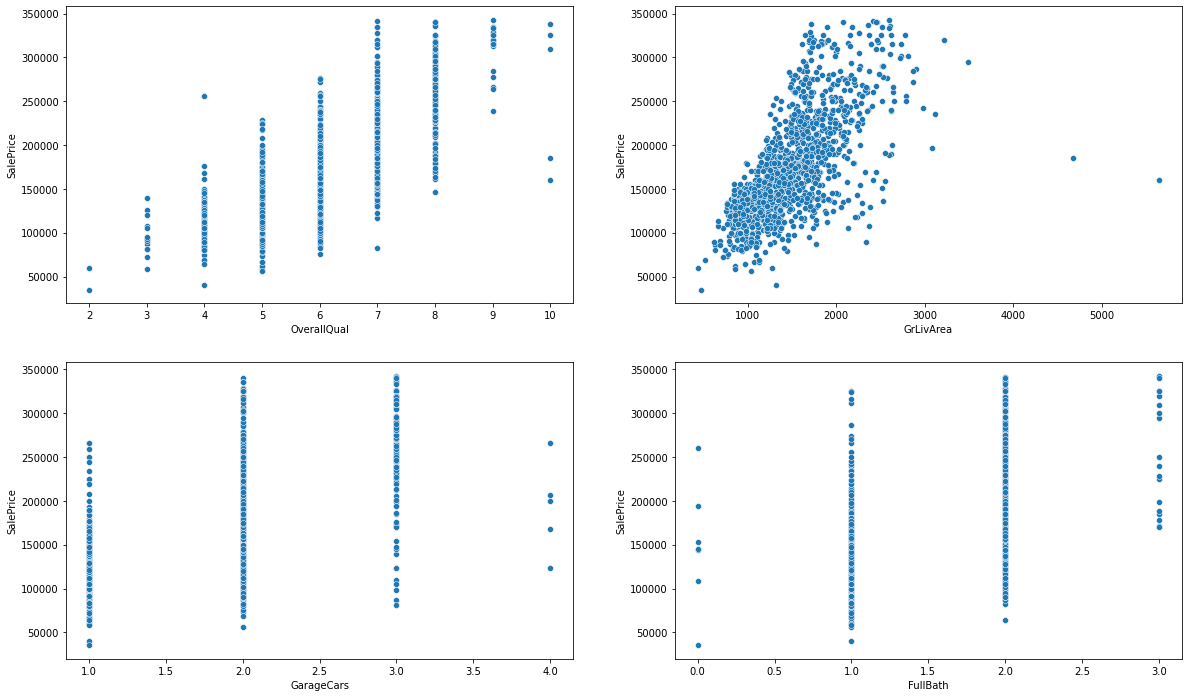

In [35]:
plt.figure(figsize=(20, 12))
plt.subplot(2,2,1)
sns.scatterplot(data=dat, x="OverallQual", y="SalePrice")
plt.subplot(2,2,2)
sns.scatterplot(data=dat, x="GrLivArea", y="SalePrice")
plt.subplot(2,2,3)
sns.scatterplot(data=dat, x="GarageCars", y="SalePrice")
plt.subplot(2,2,4)
sns.scatterplot(data=dat, x="FullBath", y="SalePrice")
plt.show()

I only plotted a few plots of the variables that are highly correlated with SalePrice. However, these plots amplify that these variables are highly correlated with SalePrice.

### Model Building

**Train and Test Split**

In [36]:
from sklearn.model_selection import train_test_split

# Specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(dat, train_size = 0.7, test_size = 0.3, random_state = 100)

**Standardize the numeric variables**

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_train[numeric_variable_name] = scaler.fit_transform(df_train[numeric_variable_name])

**Dividing into X and Y sets for the model building**

In [38]:
y_train = df_train.pop('SalePrice')
X_train = df_train

### Model 1
**Cross Validation and Recursive Feature Elimination**

Use cross validation and recursive feature elimination to select best number of features and the features 

In [39]:
from sklearn.model_selection import KFold
from sklearn.base import clone

# Calculates RMSE from actual and predicted values
def rmse(actual, predicted):
    return np.sqrt(np.mean((actual - predicted) ** 2))

def cross_validate_rmse(model, X, y):
    model = clone(model)
    five_fold = KFold(n_splits=5)
    rmse_values = []
    for tr_ind, va_ind in five_fold.split(X):
        model.fit(X.iloc[tr_ind,:], y.iloc[tr_ind])
        rmse_values.append(rmse(y.iloc[va_ind], model.predict(X.iloc[va_ind,:])))
    return np.mean(rmse_values)

In [40]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

# Get the root mean squared error respect to the number of features
err = []
for i in range(1, 70):
    rfe = RFE(lm, i)             
    err = np.append(err, cross_validate_rmse(rfe, X_train, y_train))
err
    

array([9.59156679e-01, 1.19056477e+12, 8.50715967e+11, 2.60324593e+11,
       3.36888441e+11, 4.30641796e+11, 3.64310452e+11, 3.71544055e+11,
       3.92635996e+11, 4.29042941e+11, 6.95385008e+11, 3.87745566e+11,
       7.44349280e+11, 5.26181052e+11, 1.84803927e+11, 1.90553512e+11,
       9.81829638e+11, 5.29931352e+11, 3.62195124e+11, 5.57817153e+11,
       5.79221453e+11, 9.33089754e+11, 9.53325558e+11, 7.81660469e+11,
       4.59734787e+11, 5.31894366e+11, 1.08711240e+12, 6.54168874e+11,
       8.52763627e+11, 1.04169423e+12, 1.10626833e+12, 1.45445496e+12,
       6.43879355e+11, 9.95068488e+11, 1.46032237e+12, 8.28966998e+11,
       7.99872249e+11, 8.10200371e+11, 8.68049251e+11, 9.49310394e+11,
       1.80807186e+12, 6.16318194e+11, 1.96630368e+12, 1.45222675e+12,
       1.00371969e+12, 1.64979555e+12, 1.93472811e+12, 8.05701810e+11,
       8.66803010e+11, 1.35866105e+12, 1.22360205e+12, 2.07142393e+12,
       7.89924488e+11, 1.67682236e+12, 1.34793567e+12, 9.43116153e+11,
      

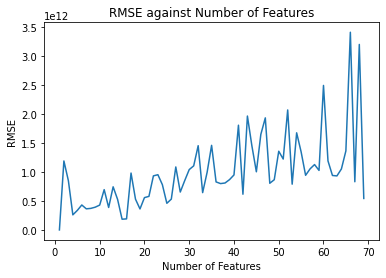

In [41]:
plt.plot(range(1, 70), err)
plt.xlabel("Number of Features")
plt.ylabel("RMSE")
plt.title("RMSE against Number of Features");

Only focus on the number of featurs that are less than 19 because the minimin cross validation error occurs before 19.

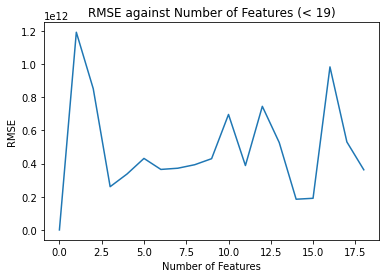

In [42]:
plt.plot(range(0, 19), err[0:19])
plt.xlabel("Number of Features")
plt.ylabel("RMSE")
plt.title("RMSE against Number of Features (< 19)");

In [43]:
temp = list(err[1:])
best_number = temp.index(min(temp))
best_number

13

13 is the optimal number of features for the regression because it has the smallest cross vaildation error.

In [44]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe1 = RFE(lm, best_number)            
rfe1 = rfe1.fit(X_train, y_train)
col = X_train.columns[rfe1.support_]

Building model using statsmodel, for the detailed statistics

In [45]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [46]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

# Run the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()  

Get the summary table

In [47]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     152.7
Date:                Thu, 20 May 2021   Prob (F-statistic):          6.56e-208
Time:                        00:20:19   Log-Likelihood:                -794.52
No. Observations:                 918   AIC:                             1615.
Df Residuals:                     905   BIC:                             1678.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0034      0.020  

From the summary table above, we can see that most of the predictors are significant away from 0 at 5% level of confidence, but there are strong multicollinearity problems. 

In [49]:
# Calculate the VIFs for the model
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,1stFlrSF,inf
2,2ndFlrSF,inf
3,LowQualFinSF,inf
4,GrLivArea,inf
10,GarageQual_Po,3.15
12,BsmtCond_Po,2.08
13,GarageCond_Po,2.00
0,const,1.13
7,BldgType_2fmCon,1.08
11,BsmtQual_Ex,1.08


Since some predictors's VIF are above 10, it indicates multicollinearity. I am going to drop some predictors to get rid of multicollinearity.

1stFlrSF is first floor square feet, and 2ndFlrSF is second floor square feet. GrLivArea is above grade (ground) living area square feet. There might be some linear relationship among these three features. 

In [50]:
dat[['1stFlrSF', '2ndFlrSF', 'GrLivArea']].corr()

,1stFlrSF,2ndFlrSF,GrLivArea
1stFlrSF,1.000000,-0.279107,0.498719
2ndFlrSF,-0.279107,1.000000,0.689545
GrLivArea,0.498719,0.689545,1.000000


The correlation between GrLivArea and 1stFlrSF is 0.5, and the correlation between GrLivArea and 2ndFlrSF is 0.7. These correlations are quite large and it indicates there are some linear relationship between GrLivArea and 1stFlrSF and between GrLivArea and 2ndFlrSF. Thus, I am going to drop GrLivArea from the regression because if I only drop 1stFlrSF or 2ndFlrSF, there is still muliticolinearity issue. However, if I drop both 1stFlrSF and 2ndFlrSF, The regression will lose 2 predictors. Thus, dropping only GrLivArea is the best choice.

In [51]:
X_train_rfe = X_train_rfe.drop(['GrLivArea'], axis = 1)
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
# Run the linear model
lm1 = sm.OLS(y_train,X_train_rfe).fit()  
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     152.7
Date:                Thu, 20 May 2021   Prob (F-statistic):          6.56e-208
Time:                        00:30:40   Log-Likelihood:                -794.52
No. Observations:                 918   AIC:                             1615.
Df Residuals:                     905   BIC:                             1678.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0034      0.020  

In [53]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,GarageQual_Po,3.15
11,BsmtCond_Po,2.08
12,GarageCond_Po,2.00
1,1stFlrSF,1.24
2,2ndFlrSF,1.14
0,const,1.13
6,BldgType_2fmCon,1.08
10,BsmtQual_Ex,1.08
5,Condition2_PosN,1.07
4,MSSubClass_90,1.01


The $R^2$ is still 0.669, all the VIFs are below 10. Thus, dropping GrLivArea is reasonable. There is no multicollinearity.

**Dropping variables that are not significant away from 0 at 5% level of significance**

From the summary table above, RoofMatl_Metal's and BsmtCond_Po's p-values are larger than 0.05. Thus, I am going to drop these variables.

In [54]:
X_train_rfe = X_train_rfe.drop(['RoofMatl_Metal'], axis = 1)

In [55]:
X_train_rfe = X_train_rfe.drop(['BsmtCond_Po'], axis = 1)

In [56]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [57]:
lm1 = sm.OLS(y_train,X_train_rfe).fit()  
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.668
Model:                            OLS   Adj. R-squared:                  0.664
Method:                 Least Squares   F-statistic:                     182.5
Date:                Thu, 20 May 2021   Prob (F-statistic):          2.52e-209
Time:                        00:39:17   Log-Likelihood:                -796.51
No. Observations:                 918   AIC:                             1615.
Df Residuals:                     907   BIC:                             1668.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0031      0.020  

After dropping LowQualFinSF, Electrical_Mix, and MiscFeature_TenC, the $R^2$ only drops 0.001 and all the predictors are statistically significant. Besides, the summary table does not shows that there are strong multicollinearity problems in the notes. Thus, this is my final model. 

In [58]:
list(X_train_rfe)

['const',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'MSSubClass_90',
 'Condition2_PosN',
 'BldgType_2fmCon',
 'RoofMatl_Membran',
 'GarageQual_Po',
 'BsmtQual_Ex',
 'GarageCond_Po']

### Model 2

The model above is the model using the features from RSE. I am going to create another model using the variables that are highly correlated(i.e. correlation are larger than or equal to 0.5) with SalePrice, and FireplaceQu which is a categorical factor that buyers will consider when buying a house. Then, use cross validation to check which model is better.

In [59]:
var = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF','GrLivArea',
'FullBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'FireplaceQu_Ex', 'FireplaceQu_Fa',
       'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA']
y_train2 = y_train
X_train2 = df_train[var]

# Fitting Linear Regression Model
X_train2 = sm.add_constant(X_train2)
lm2= sm.OLS(y_train2,X_train2).fit()  
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     263.0
Date:                Thu, 20 May 2021   Prob (F-statistic):          1.11e-316
Time:                        00:40:15   Log-Likelihood:                -530.71
No. Observations:                 918   AIC:                             1093.
Df Residuals:                     902   BIC:                             1171.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1067      0.023     -4.

In [60]:
vif = pd.DataFrame()
X = X_train2
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,GarageYrBlt,3.87
10,GarageArea,3.86
9,GarageCars,3.67
2,YearBuilt,3.61
5,1stFlrSF,2.88
4,TotalBsmtSF,2.75
6,GrLivArea,2.62
0,const,2.49
1,OverallQual,2.49
7,FullBath,2.26


The predictors' VIFs are below 10. Thus, there is no multicollinearity issue.

**Dropping numeric variables that are not significant away from 0 at 5% level of significance**

In [61]:
X_train2 = X_train2.drop(['1stFlrSF', 'GarageCars'], axis = 1)

In [62]:
X_train2 = sm.add_constant(X_train2)
lm2= sm.OLS(y_train2,X_train2).fit()  
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     304.1
Date:                Thu, 20 May 2021   Prob (F-statistic):          3.85e-319
Time:                        00:44:25   Log-Likelihood:                -530.77
No. Observations:                 918   AIC:                             1090.
Df Residuals:                     904   BIC:                             1157.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.1073      0.022     -4.

### Model Selection

In [63]:
# Using Cross Validation to choose between model 1 and model 2
lm1 = LinearRegression()
lm1.fit(X_train_rfe, y_train)
lm2 = LinearRegression()
lm2.fit(X_train2, y_train2)
model1 = clone(lm1)
model2 = clone(lm2)
five_fold = KFold(n_splits=5)
rmse_values_model1 = []
rmse_values_model2 = []
for tr_ind, va_ind in five_fold.split(X):
    model1.fit(X_train_rfe.iloc[tr_ind,:], y_train.iloc[tr_ind])
    model2.fit(X_train2.iloc[tr_ind,:], y_train2.iloc[tr_ind])
    rmse_values_model1.append(rmse(y_train.iloc[va_ind], model1.predict(X_train_rfe.iloc[va_ind,:])))
    rmse_values_model2.append(rmse(y_train2.iloc[va_ind], model2.predict(X_train2.iloc[va_ind,:])))
    err_model1 = np.mean(rmse_values_model1)
    err_model2 = np.mean(rmse_values_model2)

The cross validation error for model 1 is

In [64]:
print(err_model1)

0.6190927844204687


The cross validation error for model 2 is

In [65]:
print(err_model2)

0.4399042917945629


The cross validation error for model 2 is smaller and the $adjuested R^2$ for model 2 is smaller. Thus, the final model is model 2 with variables OverallQual, YearBuilt, YearRemodAdd, TotalBsmtSF, GrLivArea, FullBath, GarageYrBlt, GarageArea and FireplaceQu.

**Residual Analysis for the Train Data**

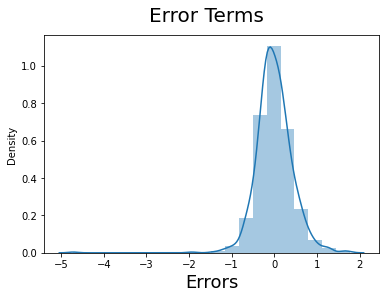

In [66]:
y_train_price = lm2.predict(X_train2)

# res is the residual
res = (y_train_price - y_train)

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train2 - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  
plt.xlabel('Errors', fontsize = 18);   

In [67]:
# Mean of the residuals
np.mean(res)

-1.3545204657736115e-17

In [68]:
# Standard Deviation of the residuals
np.std(res)

0.431381538606648

From the histogram and the data above, the error terms are mean zero.

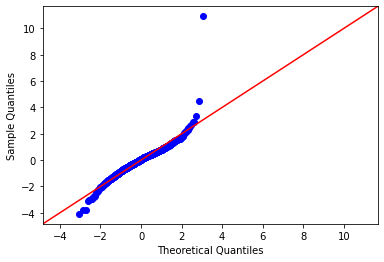

In [69]:
# Plot Q-Q plot
sm.qqplot((res - np.mean(res))/np.std(res), line ='45');

Most of the points follow the line.

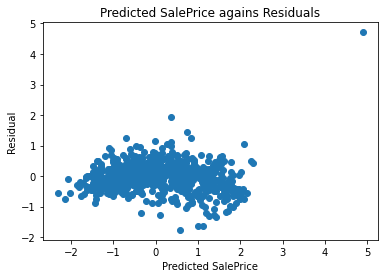

In [70]:
plt.scatter(y_train_price, res)
plt.xlabel("Predicted SalePrice")
plt.ylabel("Residual")
plt.title("Predicted SalePrice agains Residuals");

There is no clear pattern between predicted sale price and residual. However, there is one outlier.

### Model Evaluation

In [71]:
# Scaling the numeric variable
df_test[numeric_variable_name] = scaler.fit_transform(df_test[numeric_variable_name])

**Splitting into X_test and y_test**

In [72]:
y_test = df_test.pop('SalePrice')

In [73]:
X_test = df_test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF','GrLivArea',
'FullBath', 'GarageYrBlt', 'GarageArea', 'FireplaceQu_Ex', 'FireplaceQu_Fa',
       'FireplaceQu_Gd', 'FireplaceQu_Po', 'FireplaceQu_TA']]

In [74]:
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

Use model to make prediction

In [75]:
# Making predictions
y_pred = lm2.predict(X_test)

In [76]:
# Root Mean Squared Error for Test Data
rmse(y_test, y_pred)

0.5654447959944348

In [77]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.680272182682812